# Importing the Required libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.ensemble import StackingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor,plot_importance
import shap
import pyswarms as ps
from pyswarms.single import GlobalBestPSO
from pyswarms.utils.plotters import plot_cost_history
import gradio as gr
import pickle
from warnings import filterwarnings
filterwarnings('ignore')

### **Reading the Data file**

In [82]:
df = pd.read_csv("C:/Users/chhon/Python Notebooks/BCS_Win_Factor_Summer_Project/mw_pw_profiles.csv",low_memory=False)
df.head()

,Unnamed: 0,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,...,key_pulse,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,...,NaN,NaN,NaN,NaN,NaN,NaN,[],5,8,17
1,1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,...,NaN,NaN,NaN,NaN,NaN,NaN,[],3,0,7
2,2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],1,0,5
3,3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
4,4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1


In [83]:
df.columns

Index(['Unnamed: 0', 'player_id', 'match_id', 'gender', 'balls_per_over',
       'start_date', 'series_name', 'match_type', 'name_x', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_sc

### **Removing unnecessary columns**

In [84]:
df.drop(['Unnamed: 0','gender', 'balls_per_over', 'series_name', 'name_x', 'name_y','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams', ], axis = 1, inplace = True)
df.columns

Index(['player_id', 'match_id', 'start_date', 'match_type', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'unique_name',
       'fantasy_score_batting', 'fantasy_score_bowling',
       'fantasy_score_total'],
      dtype='object')

### **Preprocessing**

In [85]:
df.isnull().sum()

player_id                0
match_id                 0
start_date               0
match_type               0
runs_scored              0
player_out               0
balls_faced              0
fours_scored             0
sixes_scored             0
catches_taken            0
run_out_direct           0
run_out_throw            0
stumpings_done           0
out_kind                 0
dot_balls_as_batsman     0
order_seen               0
balls_bowled             0
runs_conceded            0
wickets_taken            0
bowled_done              0
lbw_done                 0
maidens                  0
dot_balls_as_bowler      0
player_team              0
opposition_team          0
unique_name              3
fantasy_score_batting    0
fantasy_score_bowling    0
fantasy_score_total      0
dtype: int64

### **Sorting according to the start date**

In [86]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df.sort_values(by=['start_date'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,unique_name,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,f44af07f,63963,2001-12-19,Test,39,1,93,6,0,0,...,0,0,2,39,England,India,C White,45,0,49
1,de8cce37,63963,2001-12-19,Test,12,1,18,2,0,1,...,0,0,0,0,India,England,VVS Laxman,14,8,26
2,b6cd714f,63963,2001-12-19,Test,4,1,16,0,0,0,...,0,1,5,96,India,England,Sarandeep Singh,4,76,84
3,725529bc,63963,2001-12-19,Test,0,1,3,0,0,0,...,0,0,3,70,India,England,SC Ganguly,-4,0,0
4,0184dc35,63963,2001-12-19,Test,3,1,61,0,0,1,...,0,0,0,0,India,England,R Dravid,3,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,4e38a3d6,1485778,2025-05-20,T20,4,1,10,0,0,0,...,0,0,0,0,Nepal,Thailand,R Poddar,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,8,Thailand,Nepal,S Chaturongrattana,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,0,0,0,0,0,1,...,0,0,0,10,Thailand,Nepal,C Sutthiruang,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,6,Chennai Super Kings,Rajasthan Royals,KK Ahmed,0,-4,0


### **Feature Generation (Separate Dataframe)**

**Preprocessing the categorical data**

In [87]:
df_features = df.copy()
lbenc = LabelEncoder()
df_features['player_id'] = lbenc.fit_transform(df_features['player_id'])
df_features = pd.get_dummies(df_features, columns = ['match_type'], drop_first = True, dtype = int)

**Generating some new features**

In [88]:
df_features['strike_rate'] = (df['runs_scored']/df['balls_faced'])*100
df_features['economy_rate'] = (df['runs_conceded']/df['balls_bowled'])*100
df_features['all_rounder']  = (df_features['runs_scored']/50 + df_features['wickets_taken']/5)*36
df_features['impact_bat'] = (df_features['runs_scored']*10 + df_features['fours_scored']*2 + df_features['sixes_scored']*3)/df_features['balls_faced']
df_features['impact_ball'] = (df_features['runs_conceded']*5 + df_features['dot_balls_as_bowler']*1.5 + df_features['maidens']*3)/df_features['balls_bowled']
df_features['fielding_impact'] = (df_features['catches_taken']*3 + (df_features['run_out_direct']+df_features['run_out_throw'])*2 + df_features['stumpings_done']*2)/df_features['balls_faced']

**Dropping some more values**

In [89]:
df_features.drop(['runs_conceded','balls_faced','balls_bowled','player_out','out_kind',
                  'dot_balls_as_batsman','dot_balls_as_bowler',
                  'fantasy_score_bowling','fantasy_score_batting'],inplace =True,axis =1)

In [90]:
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team', 'unique_name',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'all_rounder', 'impact_bat', 'impact_ball',
       'fielding_impact'],
      dtype='object')

### **Weighted Moving Average**
WMA (Weighted Moving Average) is a type of moving average that assigns more importance (weight) to recent data points when calculating the average. The weights are the hyperparameters here.

For a data series $ P = [P_1, P_2, ..., P_n]  $ and a window size of $ n $ :

$$
\text{WMA}_t = \frac{\sum_{i=1}^{n} w_i \cdot P_{t - n + i}}{\sum_{i=1}^{n} w_i}
$$

Where:
- $w_i $ are the weights (typically: $ w_i = i $)
- $P_{t - n + i} $ is the value $ i $ steps back from time $ t $

---

In [91]:
def wma(col,span): # Weighted Moving Average function
  weights = np.array([i ** math.e for i in range(1, span + 1)]) # Custom wieghts :)
  return col.rolling(span).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

sel_feat = [
    'runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken',
    'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken',
    'bowled_done', 'lbw_done', 'maidens', 'strike_rate', 'economy_rate','all_rounder','impact_bat','impact_ball','fielding_impact','fantasy_score_total'
]
span = [1,5,10]
for col in sel_feat:
  for n in span:
    col_name = f"{col}_{n}"
    df_features[col_name] = (
            df_features
            .groupby('player_id')[col]
            .transform(lambda x: wma(x.shift(1), n))
        )

In [92]:
df_features.shape
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team', 'unique_name',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'all_rounder', 'impact_bat', 'impact_ball',
       'fielding_impact', 'runs_scored_1', 'runs_scored_5', 'runs_scored_10',
       'fours_scored_1', 'fours_scored_5', 'fours_scored_10', 'sixes_scored_1',
       'sixes_scored_5', 'sixes_scored_10', 'catches_taken_1',
       'catches_taken_5', 'catches_taken_10', 'run_out_direct_1',
       'run_out_direct_5', 'run_out_direct_10', 'run_out_throw_1',
       'run_out_throw_5', 'run_out_throw_10', 'stumpings_done_1',
       'stumpings_done_5', 'stumpings_done_10', 'wickets_taken_1',
 

In [93]:
df_features.drop(['runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken',
    'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken',
    'bowled_done', 'lbw_done', 'maidens', 'strike_rate', 'economy_rate','impact_bat','impact_ball','all_rounder','fielding_impact'],inplace = True, axis = 1)
df_features.fillna(0, inplace=True)
df_features.sort_values(by=['start_date'], inplace=True)
df_features.reset_index(drop=True, inplace=True)

In [94]:
df_features.shape

(416712, 67)

In [95]:
df_features.columns

Index(['player_id', 'match_id', 'start_date', 'order_seen', 'player_team',
       'opposition_team', 'unique_name', 'fantasy_score_total',
       'match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20',
       'match_type_Test', 'runs_scored_1', 'runs_scored_5', 'runs_scored_10',
       'fours_scored_1', 'fours_scored_5', 'fours_scored_10', 'sixes_scored_1',
       'sixes_scored_5', 'sixes_scored_10', 'catches_taken_1',
       'catches_taken_5', 'catches_taken_10', 'run_out_direct_1',
       'run_out_direct_5', 'run_out_direct_10', 'run_out_throw_1',
       'run_out_throw_5', 'run_out_throw_10', 'stumpings_done_1',
       'stumpings_done_5', 'stumpings_done_10', 'wickets_taken_1',
       'wickets_taken_5', 'wickets_taken_10', 'bowled_done_1', 'bowled_done_5',
       'bowled_done_10', 'lbw_done_1', 'lbw_done_5', 'lbw_done_10',
       'maidens_1', 'maidens_5', 'maidens_10', 'strike_rate_1',
       'strike_rate_5', 'strike_rate_10', 'economy_rate_1', 'economy_rate_5',
     

### **Comparison between final feature generated Dataframe and Old Dataframe**

In [96]:
df

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,unique_name,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,f44af07f,63963,2001-12-19,Test,39,1,93,6,0,0,...,0,0,2,39,England,India,C White,45,0,49
1,de8cce37,63963,2001-12-19,Test,12,1,18,2,0,1,...,0,0,0,0,India,England,VVS Laxman,14,8,26
2,b6cd714f,63963,2001-12-19,Test,4,1,16,0,0,0,...,0,1,5,96,India,England,Sarandeep Singh,4,76,84
3,725529bc,63963,2001-12-19,Test,0,1,3,0,0,0,...,0,0,3,70,India,England,SC Ganguly,-4,0,0
4,0184dc35,63963,2001-12-19,Test,3,1,61,0,0,1,...,0,0,0,0,India,England,R Dravid,3,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,4e38a3d6,1485778,2025-05-20,T20,4,1,10,0,0,0,...,0,0,0,0,Nepal,Thailand,R Poddar,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,8,Thailand,Nepal,S Chaturongrattana,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,0,0,0,0,0,1,...,0,0,0,10,Thailand,Nepal,C Sutthiruang,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,6,Chennai Super Kings,Rajasthan Royals,KK Ahmed,0,-4,0


In [97]:
df_features

,player_id,match_id,start_date,order_seen,player_team,opposition_team,unique_name,fantasy_score_total,match_type_MDM,match_type_ODI,...,impact_bat_10,impact_ball_1,impact_ball_5,impact_ball_10,fielding_impact_1,fielding_impact_5,fielding_impact_10,fantasy_score_total_1,fantasy_score_total_5,fantasy_score_total_10
0,11182,63963,2001-12-19,7,England,India,C White,49,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1878,63963,2001-12-19,0,India,England,SS Das,44,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,10153,63963,2001-12-19,6,England,India,A Flintoff,84,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,11344,63963,2001-12-19,3,England,India,N Hussain,62,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,10707,63963,2001-12-19,2,England,India,ME Trescothick,38,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,Somerset,The Blaze,E Corney,42,0,0,...,6.310701,0.000000,0.000000,0.000000,0.000000,0.000000,0.001815,17.0,17.700691,20.161559
416708,7111,1462374,2025-05-20,7,Somerset,The Blaze,A Wellington,96,0,0,...,0.000000,3.400000,4.080662,4.468867,0.000000,0.000000,0.000000,43.0,76.887055,75.593379
416709,10032,1462374,2025-05-20,8,Somerset,The Blaze,C Skelton,13,0,0,...,0.000000,4.016129,4.928762,5.207377,0.272727,0.000000,0.000000,70.0,64.304453,55.900844
416710,10220,1473500,2025-05-20,2,Chennai Super Kings,Rajasthan Royals,DP Conway,16,0,0,...,7.157930,0.000000,0.000000,0.000000,1.500000,0.801527,0.481772,10.0,24.920600,34.110292


### **Dividing the Datasets**

In [98]:
df_features['start_date'] = pd.to_datetime(df_features['start_date'], errors='coerce')
zipper = pd.to_datetime('2023-08-21')
df_train = df_features[df_features['start_date'] < zipper]
df_test = df_features[df_features['start_date'] >= zipper]

In [99]:
df_train

,player_id,match_id,start_date,order_seen,player_team,opposition_team,unique_name,fantasy_score_total,match_type_MDM,match_type_ODI,...,impact_bat_10,impact_ball_1,impact_ball_5,impact_ball_10,fielding_impact_1,fielding_impact_5,fielding_impact_10,fantasy_score_total_1,fantasy_score_total_5,fantasy_score_total_10
0,11182,63963,2001-12-19,7,England,India,C White,49,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000
1,1878,63963,2001-12-19,0,India,England,SS Das,44,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000
2,10153,63963,2001-12-19,6,England,India,A Flintoff,84,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000
3,11344,63963,2001-12-19,3,England,India,N Hussain,62,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000
4,10707,63963,2001-12-19,2,England,India,ME Trescothick,38,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333487,9678,1377729,2023-08-20,0,United Arab Emirates,New Zealand,Aayan Afzal Khan,56,0,0,...,0.000000,4.729167,5.017158,5.066719,0.0,0.00000,0.000000,74.0,48.882255,42.901729
333488,2628,1347553,2023-08-20,0,Essex,Kent,BMJ Allison,7,0,0,...,0.000000,5.162791,5.972344,6.923545,0.0,0.00000,0.000000,15.0,16.508701,19.537958
333489,7353,1347550,2023-08-20,0,Hampshire,Surrey,JJ Weatherley,122,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,12.0,13.389170,21.255348
333490,2981,1347550,2023-08-20,0,Hampshire,Surrey,IG Holland,135,0,0,...,8.564759,2.593750,3.728169,4.002677,0.0,0.00333,0.038827,92.0,80.828025,73.526466


In [100]:
df_test

,player_id,match_id,start_date,order_seen,player_team,opposition_team,unique_name,fantasy_score_total,match_type_MDM,match_type_ODI,...,impact_bat_10,impact_ball_1,impact_ball_5,impact_ball_10,fielding_impact_1,fielding_impact_5,fielding_impact_10,fantasy_score_total_1,fantasy_score_total_5,fantasy_score_total_10
333492,6686,1355634,2023-08-21,0,Oval Invincibles,Trent Rockets,JDS Neesham,8,0,0,...,0.000000,6.450000,6.075575,6.704745,0.176471,0.130992,0.000000,35.0,49.390351,49.489181
333493,6713,1355634,2023-08-21,2,Trent Rockets,Oval Invincibles,AD Hales,9,0,0,...,11.244889,0.000000,0.000000,0.000000,0.000000,0.564662,0.601116,43.0,29.857065,27.904710
333494,11401,1393311,2023-08-21,4,Uganda,Tanzania,RB Patel,85,0,0,...,7.019944,0.000000,0.000000,0.000000,0.000000,0.000571,0.006656,17.0,31.831336,34.599250
333495,391,1393311,2023-08-21,0,Tanzania,Uganda,S Thakor,42,0,0,...,0.000000,7.437500,6.423762,0.000000,0.428571,0.000000,0.000000,76.0,54.907083,48.460888
333496,7481,1355634,2023-08-21,1,Trent Rockets,Oval Invincibles,JE Root,23,0,0,...,12.411139,0.000000,0.000000,0.000000,0.750000,0.436397,0.289428,29.0,38.407333,54.234634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,Somerset,The Blaze,E Corney,42,0,0,...,6.310701,0.000000,0.000000,0.000000,0.000000,0.000000,0.001815,17.0,17.700691,20.161559
416708,7111,1462374,2025-05-20,7,Somerset,The Blaze,A Wellington,96,0,0,...,0.000000,3.400000,4.080662,4.468867,0.000000,0.000000,0.000000,43.0,76.887055,75.593379
416709,10032,1462374,2025-05-20,8,Somerset,The Blaze,C Skelton,13,0,0,...,0.000000,4.016129,4.928762,5.207377,0.272727,0.000000,0.000000,70.0,64.304453,55.900844
416710,10220,1473500,2025-05-20,2,Chennai Super Kings,Rajasthan Royals,DP Conway,16,0,0,...,7.157930,0.000000,0.000000,0.000000,1.500000,0.801527,0.481772,10.0,24.920600,34.110292


In [101]:
X_train = df_train.drop(['fantasy_score_total', 'match_id', 'start_date','unique_name','player_team','opposition_team'], axis = 1)
y_train = df_train['fantasy_score_total']

In [102]:
X_test = df_test.drop(['fantasy_score_total', 'match_id', 'start_date','unique_name','player_team','opposition_team'], axis = 1)
y_test = df_test['fantasy_score_total']

In [103]:
X_train.shape

(333492, 61)

In [104]:
y_train.shape

(333492,)

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333492 entries, 0 to 333491
Data columns (total 61 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   player_id               333492 non-null  int32  
 1   order_seen              333492 non-null  int64  
 2   match_type_MDM          333492 non-null  int32  
 3   match_type_ODI          333492 non-null  int32  
 4   match_type_ODM          333492 non-null  int32  
 5   match_type_T20          333492 non-null  int32  
 6   match_type_Test         333492 non-null  int32  
 7   runs_scored_1           333492 non-null  float64
 8   runs_scored_5           333492 non-null  float64
 9   runs_scored_10          333492 non-null  float64
 10  fours_scored_1          333492 non-null  float64
 11  fours_scored_5          333492 non-null  float64
 12  fours_scored_10         333492 non-null  float64
 13  sixes_scored_1          333492 non-null  float64
 14  sixes_scored_5          3

In [196]:
xg = XGBRegressor(
    learning_rate=0.1,
    max_depth=8,
    n_estimators=800,
    subsample=0.65,
    colsample_bytree=0.9,
    reg_alpha=4,
    reg_lambda= 5,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

In [197]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=-1, num_parallel_tree=None, ...)

In [198]:
predicted_fst = xg.predict(X_test)

In [199]:
print("RMSE:", mean_squared_error(y_test, predicted_fst))
print("R2 Score:", r2_score(y_test, predicted_fst))

RMSE: 1453.565185546875
R2 Score: 0.15116584300994873


In [200]:
df_test['predicted_fst'] = predicted_fst
df_test

,player_id,match_id,start_date,order_seen,player_team,opposition_team,unique_name,fantasy_score_total,match_type_MDM,match_type_ODI,...,impact_ball_1,impact_ball_5,impact_ball_10,fielding_impact_1,fielding_impact_5,fielding_impact_10,fantasy_score_total_1,fantasy_score_total_5,fantasy_score_total_10,predicted_fst
333492,6686,1355634,2023-08-21,0,Oval Invincibles,Trent Rockets,JDS Neesham,8,0,0,...,6.450000,6.075575,6.704745,0.176471,0.130992,0.000000,35.0,49.390351,49.489181,42.747906
333493,6713,1355634,2023-08-21,2,Trent Rockets,Oval Invincibles,AD Hales,9,0,0,...,0.000000,0.000000,0.000000,0.000000,0.564662,0.601116,43.0,29.857065,27.904710,39.296211
333494,11401,1393311,2023-08-21,4,Uganda,Tanzania,RB Patel,85,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000571,0.006656,17.0,31.831336,34.599250,31.681135
333495,391,1393311,2023-08-21,0,Tanzania,Uganda,S Thakor,42,0,0,...,7.437500,6.423762,0.000000,0.428571,0.000000,0.000000,76.0,54.907083,48.460888,38.208454
333496,7481,1355634,2023-08-21,1,Trent Rockets,Oval Invincibles,JE Root,23,0,0,...,0.000000,0.000000,0.000000,0.750000,0.436397,0.289428,29.0,38.407333,54.234634,46.192390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,Somerset,The Blaze,E Corney,42,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001815,17.0,17.700691,20.161559,47.539776
416708,7111,1462374,2025-05-20,7,Somerset,The Blaze,A Wellington,96,0,0,...,3.400000,4.080662,4.468867,0.000000,0.000000,0.000000,43.0,76.887055,75.593379,51.552822
416709,10032,1462374,2025-05-20,8,Somerset,The Blaze,C Skelton,13,0,0,...,4.016129,4.928762,5.207377,0.272727,0.000000,0.000000,70.0,64.304453,55.900844,54.503601
416710,10220,1473500,2025-05-20,2,Chennai Super Kings,Rajasthan Royals,DP Conway,16,0,0,...,0.000000,0.000000,0.000000,1.500000,0.801527,0.481772,10.0,24.920600,34.110292,43.208206


In [201]:
eval_df = (
    df_test.groupby('match_id').apply(
        lambda x: pd.Series({
            'sum_top11_actual' : x['fantasy_score_total'].nlargest(11).sum(),
            'sum_top11_predicted' : x['predicted_fst'].nlargest(11).sum(),
        })
    ).reset_index()
)
eval_df

,match_id,sum_top11_actual,sum_top11_predicted
0,1336048,643.0,532.194824
1,1336049,745.0,549.195007
2,1336050,772.0,502.742004
3,1336051,697.0,480.100922
4,1336052,891.0,608.960754
...,...,...,...
3755,1484052,762.0,476.314117
3756,1485778,649.0,445.936249
3757,1486225,846.0,436.314240
3758,1486227,688.0,491.200195


In [202]:
eval_df['abs_%_error'] = (
    (eval_df['sum_top11_predicted'] - eval_df['sum_top11_actual']).abs() /
    eval_df['sum_top11_actual']
) * 100
eval_df['_%_error'] = (
    (eval_df['sum_top11_predicted'] - eval_df['sum_top11_actual']) /
    eval_df['sum_top11_actual']
) * 100
mean_abs_percentage_error = eval_df['abs_%_error'].mean()
mean_percentage_error = eval_df['_%_error'].mean()
print(f"Mean Absolute % Error: {mean_abs_percentage_error:.2f}")
print(f"Mean % Error: {mean_percentage_error:.2f}")

Mean Absolute % Error: 29.68
Mean % Error: -22.07


In [203]:
eval_df

,match_id,sum_top11_actual,sum_top11_predicted,abs_%_error,_%_error
0,1336048,643.0,532.194824,17.232531,-17.232531
1,1336049,745.0,549.195007,26.282549,-26.282549
2,1336050,772.0,502.742004,34.877979,-34.877979
3,1336051,697.0,480.100922,31.118950,-31.118950
4,1336052,891.0,608.960754,31.654236,-31.654236
...,...,...,...,...,...
3755,1484052,762.0,476.314117,37.491586,-37.491586
3756,1485778,649.0,445.936249,31.288714,-31.288714
3757,1486225,846.0,436.314240,48.426213,-48.426213
3758,1486227,688.0,491.200195,28.604623,-28.604623


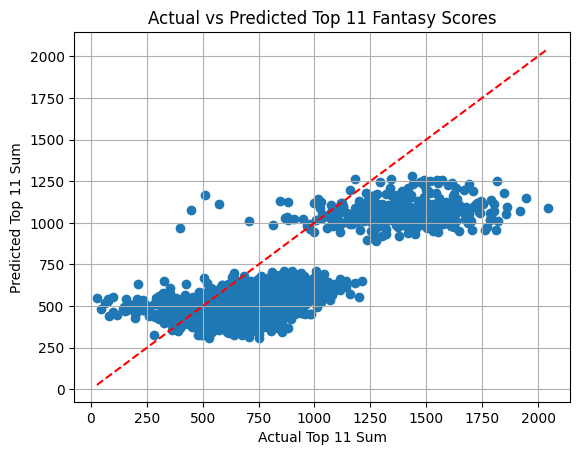

In [204]:
plt.scatter(
    eval_df['sum_top11_actual'],
    eval_df['sum_top11_predicted'],
)
plt.plot([eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         [eval_df['sum_top11_actual'].min(), eval_df['sum_top11_actual'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')
plt.grid()
plt.show()

In [205]:
explainer = shap.TreeExplainer(xg)
explain = explainer(X_test)

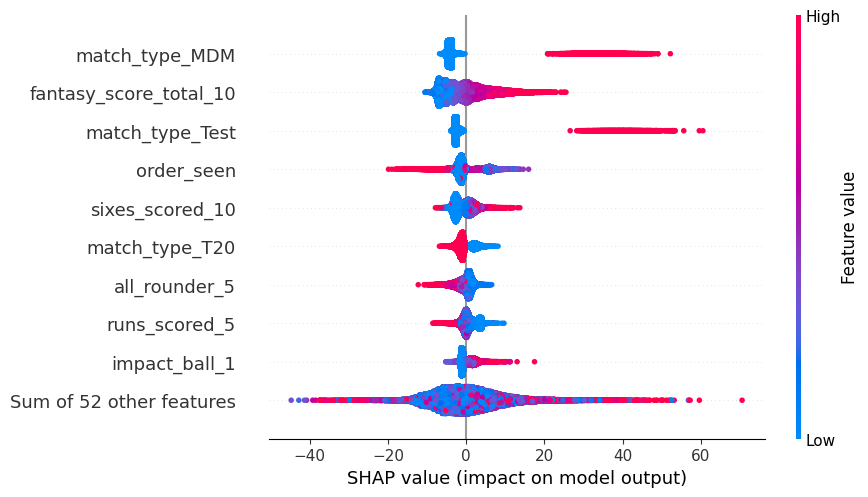

In [206]:
shap.plots.beeswarm(explain)

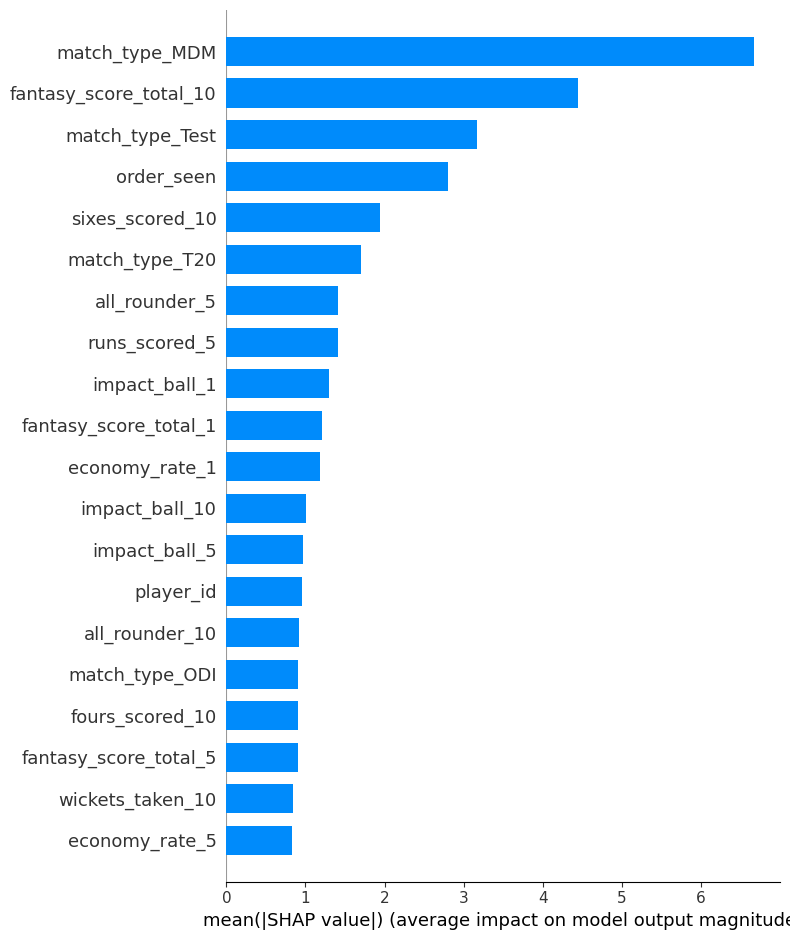

In [207]:
shap.summary_plot(explain, X_test, plot_type="bar")

In [208]:
with open('XGBoost_model.pkl', 'wb') as f:
    pickle.dump(xg, f)

In [209]:
df_features

,player_id,match_id,start_date,order_seen,player_team,opposition_team,unique_name,fantasy_score_total,match_type_MDM,match_type_ODI,...,impact_bat_10,impact_ball_1,impact_ball_5,impact_ball_10,fielding_impact_1,fielding_impact_5,fielding_impact_10,fantasy_score_total_1,fantasy_score_total_5,fantasy_score_total_10
0,11182,63963,2001-12-19,7,England,India,C White,49,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1878,63963,2001-12-19,0,India,England,SS Das,44,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,10153,63963,2001-12-19,6,England,India,A Flintoff,84,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,11344,63963,2001-12-19,3,England,India,N Hussain,62,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,10707,63963,2001-12-19,2,England,India,ME Trescothick,38,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,1462374,2025-05-20,2,Somerset,The Blaze,E Corney,42,0,0,...,6.310701,0.000000,0.000000,0.000000,0.000000,0.000000,0.001815,17.0,17.700691,20.161559
416708,7111,1462374,2025-05-20,7,Somerset,The Blaze,A Wellington,96,0,0,...,0.000000,3.400000,4.080662,4.468867,0.000000,0.000000,0.000000,43.0,76.887055,75.593379
416709,10032,1462374,2025-05-20,8,Somerset,The Blaze,C Skelton,13,0,0,...,0.000000,4.016129,4.928762,5.207377,0.272727,0.000000,0.000000,70.0,64.304453,55.900844
416710,10220,1473500,2025-05-20,2,Chennai Super Kings,Rajasthan Royals,DP Conway,16,0,0,...,7.157930,0.000000,0.000000,0.000000,1.500000,0.801527,0.481772,10.0,24.920600,34.110292


### **Setting up the interface**

**Loading the trained model**

In [216]:
with open('XGBoost_model.pkl', 'rb') as f:
    xg = pickle.load(f)

**wrapper function for gradio interface**

In [221]:
def get_top11_players(player_ids_string,match_date_string):
    match_date = pd.to_datetime(match_date_string, errors='coerce')
    player_ids = [int(pid.strip()) for pid in player_ids_string.split(",")] # Convertig player IDs to integers

    df_required = df_features[
        (df_features["player_id"].isin(player_ids)) &
        (df_features["start_date"] < match_date)  
    ]

    df_required = df_required.sort_values(by="start_date").groupby("player_id").tail(1) # considering the most recent record ofr each player
    
    X = df_required.drop(['fantasy_score_total', 'match_id', 'start_date','unique_name','player_team','opposition_team'], axis=1)
    X = X.select_dtypes(include=[np.number])  # Ensure only numeric columns are used

    model_feat = xg.get_booster().feature_names 
    for col in model_feat: # Adding missing columns with default value 0.0
        if col not in X.columns:
            X[col] = 0.0
    X = X[model_feat]

    predicted_fst = xg.predict(X)

    result_df = df_required[['player_id', 'unique_name', 'player_team', 'opposition_team']].copy()
    result_df['predicted_fst'] = predicted_fst
    result_df =  result_df.sort_values(by='predicted_fst', ascending=False).head(11)
    result_df = result_df.rename(columns={
    "player_id": "Player ID",
    "unique_name": "Name",
    "player_team": "Team",
    "opposition_team": "Opposite team",
    "predicted_fst": "Predicted Points",
    })
    return result_df[["Player ID", "Name", "Team", "Opposite team", "Predicted Points"]]



**Code block to find Player IDs corresponding to a match date**

In [222]:
match_date = pd.to_datetime("2024-10-30")

match_ids_on_this_date = df_features[df_features["start_date"] == match_date]["match_id"].unique() # Get match IDs for the specified date

if len(match_ids_on_this_date) == 0:
    raise ValueError("No match found on this date")
elif len(match_ids_on_this_date) > 1:
    print("Multiple match found on this date. Using the first match ID for sampling")

required_match_id = match_ids_on_this_date[0]

sample_ids = df_features[df_features["match_id"] == required_match_id]["player_id"].dropna().unique() # Get player IDs for that match

input_string = ", ".join(str(i) for i in sample_ids[:22]) # Taking first 22 player IDs as input
print( input_string)

Multiple match found on this date. Using the first match ID for sampling
11752, 1927, 5910, 7059, 11390, 2038, 8341, 5627, 1328, 11268, 8883, 1980, 8982, 8924, 8456, 6958, 1245, 8356, 1762, 2104, 4714, 5771


In [223]:
with open('XGBoost_model.pkl', 'rb') as f:
    xg = pickle.load(f)

**Running the gradio Interface**

In [225]:
placeholder_df = pd.DataFrame( # Dummy DataFrame to preload the gradio interface
    [["-", "-", "-", "-", "-"]],
    columns=["Player ID", "Name", "Team", "Opposite team", "Predicted Points"]
)

gr.Interface(
    fn=get_top11_players,
    inputs=[
        gr.Textbox(label="Enter 22 Player IDs (comma-separated)", lines=2, placeholder="Example: 11752, 1927, 5910, 7059, ..."),
        gr.Textbox(label="Match Date (YYYY-MM-DD)", placeholder="Example: 2024-10-30")
    ],
    outputs=gr.Dataframe(
        headers=["Player ID", "Name", "Team", "Opposite team", "Predicted Points"],
        value=placeholder_df  # This preloads the dummy output
    ),
    title="Fantasy Cricket Team Selector Application",
    description="Enter 22 player IDs, enter match date, and get the predicted best 11 players with fantasy points in tabular form."
).launch()


* Running on local URL:  http://127.0.0.1:7871


2025-07-10 15:46:44,295 - httpx - INFO - HTTP Request: GET http://127.0.0.1:7871/gradio_api/startup-events "HTTP/1.1 200 OK"
2025-07-10 15:46:44,324 - httpx - INFO - HTTP Request: HEAD http://127.0.0.1:7871/ "HTTP/1.1 200 OK"


* To create a public link, set `share=True` in `launch()`.


2025-07-10 15:46:45,445 - httpx - INFO - HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"
